# **Lecture 13 - Importing/Exporting Data**

---

<br>

### Packages

In [ ]:
# install packages
install.packages("dslabs")
install.packages("readxl")   # imports excel spreadsheets
install.packages("writexl")  # exports excel spreadsheets

In [ ]:
# load libraries
library(dslabs)
library(readxl)
library(writexl)

<br>

<br>

---

<br>

### Importing-Exporting Data

* Thus far, we have learned a lot about how we can use `R` to process data
  * Descriptive statistics
  * Plotting
  * Subsetting
  * Functions
  * Loops

<br>

* The datasets we used are either preloaded in a package or I have provided code to load data

* Obviously, this is not the case in real-world data analysis!

<br>

* In today's lecture, we'll learn how to

  * import data into `R` from various file formats

  * export data out of `R` onto our computers

  * navigate a file directories using `R` code

<br>

<br>

---

<br>

### Importing Data

* Importing data is the process of bringing data that is stored in a separate environment into your own `R` working environment

* The way we import data depends how the desired data is stored externally

* Most often, the data you will encounter in your career will either be in a text file format or spreadsheet format

<br>

#### Text Files - `.csv`

* The majority of text file formats you will encounter will have the extension
  * .csv
  * .txt

<br>

* The file extension `.csv` means "comma separated value"

* Data within `.csv` files is stored as a table with rows and columns

* Each row of data is a separate line

* Each column of data is separated by a comma (",")


<br>

* In text files, the character string that defines a separate column, such as the "," in `.csv` is called a "***delimiter***"

* Another way to refer to `.csv` files is "comma delimited files"

<br>

* Our familiar `murders` data frame in `.csv` format can be found at the following web address:

  https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/murders.csv

* Note how each column in the `murders` dataset is separated by a comma



<br>

##### Importing a `.csv` file

* In `R`, `.csv` files can be imported using the `read.csv()` function

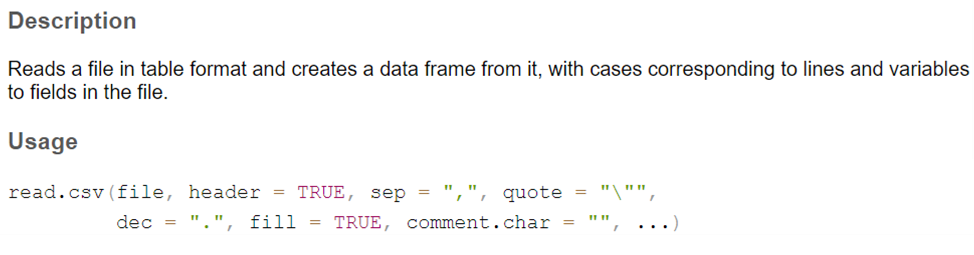

* `file` - filepath to the dataset

* `header` - Set to `TRUE` if the first line in your data contains the variable names

* `sep` - The delimiter in your file. This is by default a "," for comma separated files

<br>

* The script below loads the `murders` dataset from the `.csv` format into `R` as a data frame

In [ ]:
# load the murders dataset as a csv file
murders_csv <- read.csv(file = "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/murders.csv",
                        header = TRUE,
                        sep = ",")

In [ ]:
# verify it was loaded correctly
head(murders_csv)

In [ ]:
# check its class
class(murders_csv)

<br>

* It's as easy as that!

<br>

##### Importing a `.txt` file

* In `R`, `.txt` files can be imported using the `read.table()` function

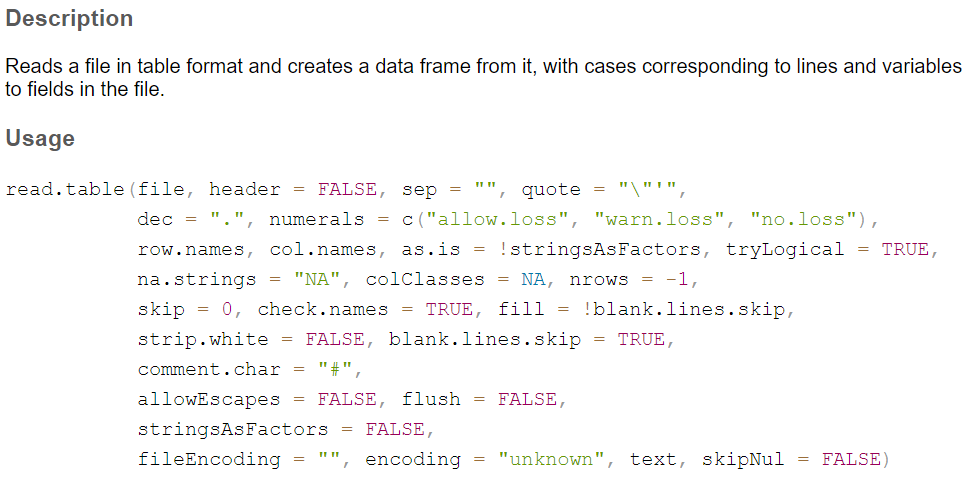

* `file` - filepath to the dataset

* `header` - Set to `TRUE` if the first line in your data contains the variable names

* `sep` - The delimiter in your file. This is by default an empty string.

<br>

* Since the default delimiter for the `read.table()` function is an empty string, which is not very useful, we must specify a delimiter

* Other than a comma, the tab is the most common delimiter when storing data as a `.txt` file

* To specify a "tab" in `R`, we use the delimiter `"\t"`

<br>

* The script below loads the `murders` dataset from the `.txt` format into `R` as a data frame from the following url

  https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/murders_tab.txt

In [ ]:
# load the murders dataset as a csv file
murders_tab <- read.table(file = "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/murders_tab.txt",
                          header = TRUE,
                          sep = "\t")

In [ ]:
# verify it was loaded correctly
head(murders_tab)

In [ ]:
# check its class
class(murders_tab)

<br>

* Other delimiters include period `"."`, `"|"`, `";"` etc.

* Below is an example script that imports a text file into `R` with the `"|"` delimiter from the following url

  https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/murders_pipe.txt

In [ ]:
# load the murders dataset as a csv file
murders_pipe <- read.table(file = "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/murders_pipe.txt",
                           header = TRUE,
                           sep = "|")

In [ ]:
# verify it was loaded correctly
head(murders_pipe)

In [ ]:
# check its class
class(murders_tab)

<br>

<br>

#### Excel Files and Spreadsheets

* To import data from spreadsheets, namely files in Microsoft Excel (`.xlsx`) format, we can use the `read_excel()` function from the `readxl` library

<br>

* The `read_excel()` function has many optional function arguments, but most of the time, we only need two

  * `path` - filepath to the dataset

  * `sheet` - An optional arugment specifying the sheet number you would like to import

<br>

* The script below loads the `murders` dataset from the `.xlsx` format into `R` as a data frame

* Unfortunately, we aren't able to load the excel file directly from a url

* Therefore, we must download the file and upload it to Google Colaboratory
  https://github.com/khasenst/datasets_teaching/blob/main/murders.xlsx

In [ ]:
# import the first sheet
murders_sheet1 <- read_excel(path = "murders.xlsx",
                             sheet = 1)

head(murders_sheet1)

In [ ]:
# import the first sheet
murders_sheet2 <- read_excel(path = "murders.xlsx",
                            sheet = 2)

head(murders_sheet2)

In [ ]:
# combine (if you want)
murders_excel <- data.frame(murders_sheet1,
                            total = murders$total)

head(murders_excel)

<br>

#### Other File Formats

* The formats discussed thus far are mostly meant to store structured data

* That is, data that takes the form of a table where rows represent observations and columns represent variables

* Next lecture, we will discuss other that can store either structured or unstructured data
  * JSON
  * html
  * xml

* There are many other more file formats relevant to special types of data, but these are outside scope of this course
  * Shapefiles for spatial data
  * `.png` or `.jpg` for images
  * `.dcm` or `.nii` for medical images

<br>

<br>

---

<br>

### Exporting Data

* After importing data and performing your analysis, you may want to

  * export a new version of your dataset that might be more organized or contain additional data

  * export a data summary for external reference

* We can export our data outside of `R` using very similar functions!

* The majority of the time, you will want to export your data as a `.csv` file

<br>

<br>

#### Exporting a `.csv` file

* We can export an `R` data frame as a `.csv` file using the function `write.csv()`

* There are three arguments that are commonly used

  * `x` - the `R` data frame to exported

  * `file` - the filename to where the data frame will be exported

  * `row.names` - Whether or not you would like the row names of the data frame to also be exported. I often set this to `FALSE`, unless there is a special reason to include the row names

<br>

* The script below exports the `murders` data frame as a `.csv` file

In [ ]:
# export data as a csv file
write.csv(x    = murders,
          file = "murders_as_csv.csv",
          row.names = FALSE)

<br>

<br>

#### Exporting a `.txt` file

* We can export an `R` data frame as a `.txt` file using the function `write.table()`

* There are four arguments that are commonly used

  * `x` - the `R` data frame to exported

  * `file` - the filename to where the data frame will be exported

  * `sep` - the delimiter when exporting the data frame

  * `row.names` - Whether or not you would like the row names of the data frame to also be exported. I often set this to `FALSE`, unless there is a special reason to include the row names

In [ ]:
# export data as a txt file with tab delimiter
write.table(x         = murders,
            file      = "murders_as_tab.txt",
            sep       = "\t",
            row.names = FALSE)

<br>

In [ ]:
# export data as a txt file with | delimiter
write.table(x         = murders,
            file      = "murders_as_pipe.txt",
            sep       = "|",
            row.names = FALSE)

<br>

<br>

#### Exporting a `.xlsx` file

* We can export an `R` data frame as a `.xlsx` file using the function `write_xlsx()`

  * `x` - the `R` data frame to exported

  * `path` - the filename to where the data frame will be exported

In [ ]:
write_xlsx(x    = murders,
           path = "murders_as_excel.xlsx")

<br>

<br>

---

<br>

### Navigating File Directories

* Thus far, we have been loading data available from the internet

* ...but what if your data is stored locally or in a special server?

<br>

* A useful skill is the ability to navigate to different files on your own system using scripts/code

* This is analogous to clicking through folders, except we do this with code!

<br>

* Below are functions that can help you navigate your directories/file system

<br>

#### `getwd()`

* The `getwd()` function "gets" your current working directory

* That is, `getwd()` shows the location that `R` is currently importing/exporting data from/to

<br>

* By default, Google Colaboratory sets our working directory to the folder `"/content"`

In [ ]:
# get our current working directory
getwd()

<br>

<br>

#### `list.files()`

* The `list.files()` function lists the files and folders in a directory

* If no arguments are given, the `list.files()` function simply lists the files in your current working directory

<br>

In [ ]:
# list files in the current working directory
print(list.files())

<br>

In [ ]:
# list files in a specified working directory
print(list.files("/content"))

<br>

<br>

#### `dir.create()`

* The `dir.create()` function can create a new folder from a specified filepath

* The script below creates a folder called `"my_data"` in the existing folder `"content"`

* To do so, we specify the filepath `"/content/my_data"`

In [ ]:
# create a new folder within a directory
dir.create("/content/my_data")

<br>

* Note that attempting to creating a directory that already exists produces a warning message

In [ ]:
# create a new folder within a directory when it already exists
dir.create("/content/my_data")

<br>

<br>

#### `setwd()`

* The `setwd()` function "sets" your working directory to a specified working directory

* We can use `setwd()` to navigate to the recently created `"my_data"` folder

In [ ]:
# set our current working directory
setwd("/content/my_data")

In [ ]:
# check our current working directory
getwd()

In [ ]:
# list files in the current directory
list.files()

# print the number of
print(length(list.files()))

* Currently, there are no files in the directory!

<br>

<br>

#### `file.path()`

* Notice how we separate each folder and file location using a forward slash `/`

* We can create filepaths manually by typing the entire character string with forward slashes

* Or we can use the `file.path()` function to do this for us!

In [ ]:
# type it out ourselves
my_path <- "/content/my_data"
my_path

In [ ]:
# using list.files()
my_path <- file.path("/content", "my_data")
my_path

<br>

<br>

#### Example

* Let's store our `murders` data frames in different file formats into their own respective folders

In [ ]:
# check our current working directory
getwd()

In [ ]:
# set our working directory
setwd("/content")

In [ ]:
# check we are in the correct directory
getwd()

<br>

* Use `dir.create()` to create folders for each type file format (`.csv`, `.txt`, `.xlsx`)

In [ ]:
# csv folder
dir.create(file.path("/content", "csv"))

# txt folder
dir.create(file.path("/content", "txt"))

# xlsx folder
dir.create(file.path("/content", "xlsx"))

In [ ]:
# check our work
print(list.files())

<br>

* Write files to the Colaboratory computer

In [ ]:
# create csv path
csv_path <- file.path("/content", "csv")
csv_path

In [ ]:
# export data to file
write.csv(x    = murders,
          file = file.path(csv_path, "murders_as_csv.csv"),
          row.names = FALSE)

<br>

In [ ]:
# create txt path
txt_path <- file.path("/content", "txt")

# export data to tab delimited file
write.table(x         = murders,
            file      = file.path(txt_path, "murders_as_tab.txt"),
            sep       = "\t",
            row.names = FALSE)

# export data to pipe delimited file
write.table(x         = murders,
            file      = file.path(txt_path, "murders_as_pipe.txt"),
            sep       = "|",
            row.names = FALSE)

<br>

In [ ]:
# create xlsx path
xlsx_path <- file.path("/content", "xlsx")

# export data to file
write_xlsx(x    = murders,
           path = file.path(xlsx_path, "xlsx_file.xlsx"))

<br>

<br>